<a href="https://colab.research.google.com/github/Frikasong/CS61Aassignment/blob/main/Module3_Assignment_w26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 3: Assignment

### Instructions

You should begin by viewing Lesson 3 on eClass (and note that the lesson includes a link to the notebook used in the videos).

Next, everyone should attempt to complete the beginner and intermediate sections of this assignment. If you are interested you can continue to advanced. Whether you choose to go beyond the beginner and intermediate sections will not affect your participation grade, but some of the skills you learn (or relearn) may be helpful for your final project for the course.

In addition, everyone should complete the final sections marked as sections for "Everyone".

Combined, the lesson and assignment should not take you more than three hours -- so if you get to that point, just move on to the "Everyone" sections (and add a text/markdown cell to the notebook indicating where you stopped and saying that you hit the 3 hour limit).

When you have finished, upload a copy of the .ipynb file to eClass assignment page.

NOTE: If you are using Colab and you downloaded this file by clicking a link, make sure to save a copy of this file on your Google Drive by selecting File, Save.

### Beginner Question 1:

Using the [Social Security Tribunal dataset](https://huggingface.co/datasets/a2aj/canadian-case-law) from A2AJ, print the names of the five earliest Social Security Tribunal cases in the dataset.

In [14]:
import pandas as pd
from datasets import load_dataset

cases = load_dataset("a2aj/canadian-case-law", data_dir="SST", split="train")
df = cases.to_pandas()
print("Available Columns:", df.columns.tolist())

cases_sorted = df.sort_values(by='document_date_en', ascending=True).head(5)
print("Case Names:\n", cases_sorted['citation_en'], "\nDocument Date:\n", cases_sorted['document_date_en'])

Available Columns: ['dataset', 'citation_en', 'citation2_en', 'name_en', 'document_date_en', 'url_en', 'scraped_timestamp_en', 'unofficial_text_en', 'citation_fr', 'citation2_fr', 'name_fr', 'document_date_fr', 'url_fr', 'scraped_timestamp_fr', 'unofficial_text_fr', 'upstream_license']
Case Names:
 73      2016 SSTADEI 129
8719        2013 SSTAD 1
8707        2013 SSTAD 2
8697        2013 SSTAD 3
6965     2014 SSTGDEI 70
Name: citation_en, dtype: object 
Document Date:
 73     2013-03-08 00:00:00+00:00
8719   2013-05-14 00:00:00+00:00
8707   2013-05-30 00:00:00+00:00
8697   2013-06-24 00:00:00+00:00
6965   2013-07-14 00:00:00+00:00
Name: document_date_en, dtype: datetime64[us, UTC]


### Beginner Question 2:

Using the [Canadian Human Rights Tribunal dataset](https://huggingface.co/datasets/a2aj/canadian-case-law) from the A2AJ, make a line chart with the average number Canadian Human Rights Tribunal decisions per year over the past 10 years.

Available Columns: ['dataset', 'citation_en', 'citation2_en', 'name_en', 'document_date_en', 'url_en', 'scraped_timestamp_en', 'unofficial_text_en', 'citation_fr', 'citation2_fr', 'name_fr', 'document_date_fr', 'url_fr', 'scraped_timestamp_fr', 'unofficial_text_fr', 'upstream_license']


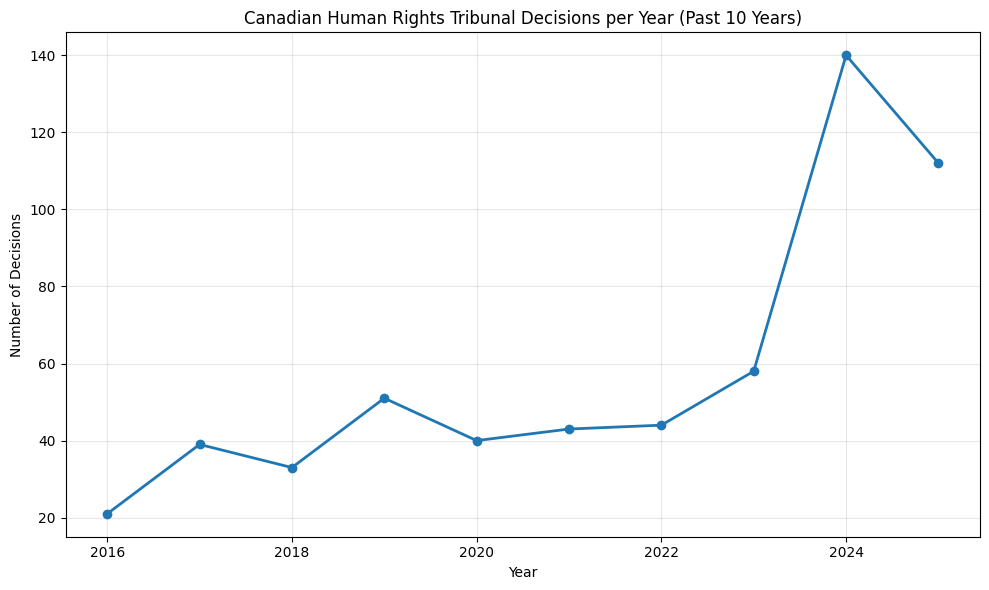

In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

cases = load_dataset("a2aj/canadian-case-law", data_dir="CHRT", split="train")
df = cases.to_pandas()
print("Available Columns:", df.columns.tolist())

df['document_date_en'] = pd.to_datetime(df['document_date_en'])
df['year'] = df['document_date_en'].dt.year

df_recent = df[df['year'] >= 2016]
yearly_counts = df_recent.groupby('year').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts['year'], yearly_counts['count'], marker='o', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Decisions')
plt.title('Canadian Human Rights Tribunal Decisions per Year (Past 10 Years)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Beginner Question 3:

Using the A2AJ's [Canadian Case Law](https://huggingface.co/datasets/a2aj/canadian-case-law) dataset, pick two courts/tribunals, and create line charts for the number of words per decision per year for the past five years for each of the two courts/tribunals. What is the most interesting change over this time that you observe?



Processing CHRT...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


CHRT Statistics:
   year   word_count
0  2020  8950.775000
1  2021  8784.418605
2  2022  9134.522727
3  2023  7816.793103
4  2024  4386.085714
5  2025  6313.062500
Change: -2638 words (-29.5%)

Processing SST...
SST Statistics:
   year   word_count
0  2020  2140.268639
1  2021  2455.332663
2  2022  2189.038961
3  2023  2453.033569
Change: 313 words (14.6%)


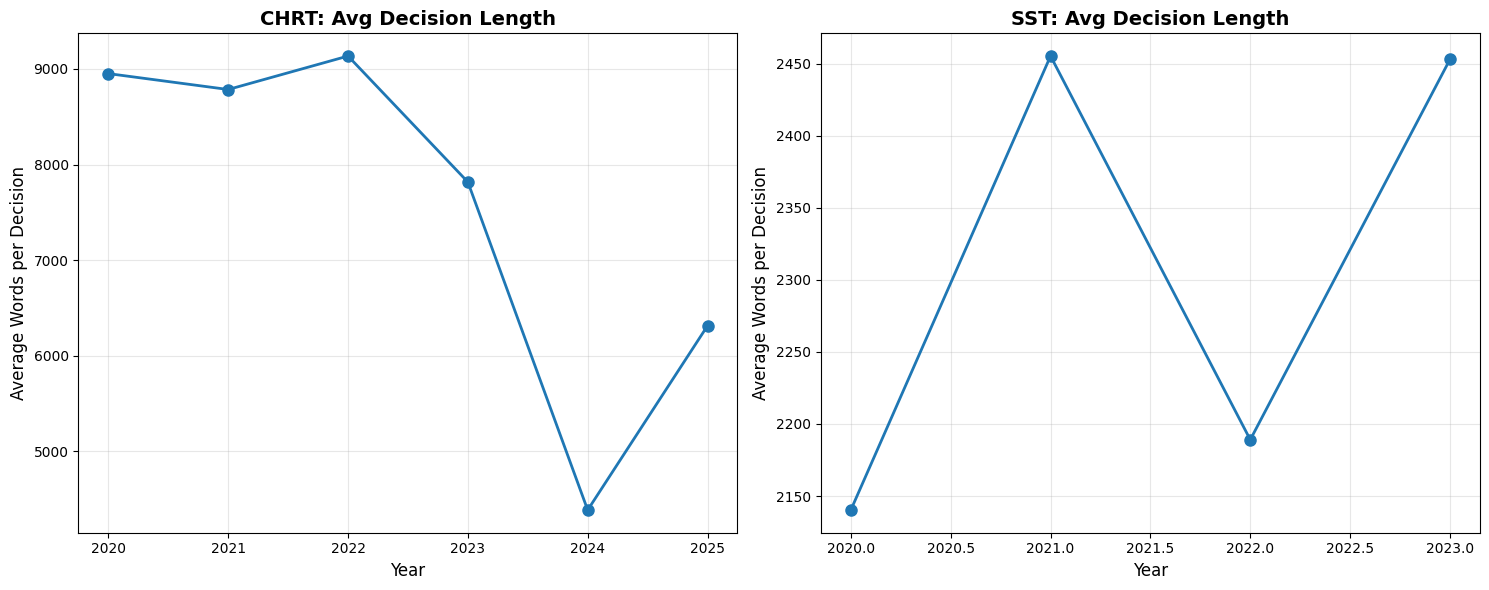

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

tribunals = ['CHRT', 'SST']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for idx, tribunal in enumerate(tribunals):
    print(f"\nProcessing {tribunal}...")
    cases = load_dataset("a2aj/canadian-case-law", data_dir=tribunal, split="train", streaming=True)

    data_list = []
    for i, case in enumerate(cases):
        if i >= 5000:
            break

        try:
            date = pd.to_datetime(case['document_date_en'])
            year = date.year

            if year >= 2020:
                text = case.get('unofficial_text_en', '')
                word_count = len(str(text).split()) if text else 0
                data_list.append({'year': year, 'word_count': word_count})
        except:
            continue

    df = pd.DataFrame(data_list)

    if len(df) > 0:
        yearly_avg = df.groupby('year')['word_count'].mean().reset_index()

        axes[idx].plot(yearly_avg['year'], yearly_avg['word_count'],
                      marker='o', linewidth=2, markersize=8)
        axes[idx].set_xlabel('Year', fontsize=12)
        axes[idx].set_ylabel('Average Words per Decision', fontsize=12)
        axes[idx].set_title(f'{tribunal}: Avg Decision Length', fontsize=14, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

        print(f"{tribunal} Statistics:")
        print(yearly_avg)
        if len(yearly_avg) > 1:
            change = yearly_avg['word_count'].iloc[-1] - yearly_avg['word_count'].iloc[0]
            pct_change = ((yearly_avg['word_count'].iloc[-1] / yearly_avg['word_count'].iloc[0]) - 1) * 100
            print(f"Change: {change:.0f} words ({pct_change:.1f}%)")

plt.tight_layout()
plt.show()

Over the years, for CHRT, the average length was reduced from 9K words in average to 5K-6K, while SST remains relatively stable in terms of length.

### Intermediate Question 1:

Using the [Tax Court of Canada dataset](https://huggingface.co/datasets/a2aj/canadian-case-law) from A2AJ, print the names of the five Tax Court of Canada cases that have most frequently been cited by the Tax Court of Canada over the past 10 years.

Hint: neutral citations follow specific patterns (e.g. YYYY TCC #).

In [2]:
import pandas as pd
from datasets import load_dataset
import re
from collections import Counter

print("Loading Tax Court of Canada dataset...")
cases = load_dataset("a2aj/canadian-case-law", data_dir="TCC", split="train", streaming=True)

citation_counter = Counter()
cases_processed = 0

print("Processing cases...")

for case in cases:
    try:
        date = pd.to_datetime(case['document_date_en'])
        if date.year >= 2015:
            text = case.get('unofficial_text_en', '')

            if text:
                tcc_citations = re.findall(r'\b((?:19|20)\d{2}\s+TCC\s+\d+)\b', str(text), re.IGNORECASE)

                normalized_citations = [' '.join(cite.upper().split()) for cite in tcc_citations]

                citation_counter.update(normalized_citations)

            cases_processed += 1
            if cases_processed % 500 == 0:
                print(f"Processed {cases_processed} cases...")

            if cases_processed >= 3000:
                break

    except Exception as e:
        continue

print("\n" + "="*80)
print("TOP 5 MOST FREQUENTLY CITED TAX COURT OF CANADA CASES (Past 10 Years)")
print("="*80)

top_5 = citation_counter.most_common(5)

for rank, (citation, count) in enumerate(top_5, 1):
    print(f"{rank}. {citation} - cited {count} times")

print(f"\nTotal cases processed: {cases_processed}")
print(f"Total unique TCC citations found: {len(citation_counter)}")

Loading Tax Court of Canada dataset...
Processing cases...
Processed 500 cases...
Processed 1000 cases...
Processed 1500 cases...

TOP 5 MOST FREQUENTLY CITED TAX COURT OF CANADA CASES (Past 10 Years)
1. 2013 TCC 380 - cited 55 times
2. 2005 TCC 545 - cited 36 times
3. 2012 TCC 273 - cited 35 times
4. 2015 TCC 92 - cited 33 times
5. 2013 TCC 143 - cited 30 times

Total cases processed: 1851
Total unique TCC citations found: 3273


### Intermediate Question 2:

Load into a dataframe the excel data that reports tabular data about Supreme Court of Canada decisions discussed in the Module 2 videos available at this URL:

    https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx

For the meaning of the values of codes in the excel data, see the coding manual [here](https://litigate.com/assets/uploads/20220216-111705-4622-Lenczner-Slaght-Supreme-Court-of-Canada-Database-Coding-Manual-v-2022.01.pdf).

Print a list the names of the 5 judges who wrote the largest number of dissenting opinions in the dataset, and then print a bar chart with their names and the number of dissenting opinions in the dataset that each of them wrote.

Do you have any theories as to why these 5 judges in particular wrote the largest number of dissenting opinions?

Loading Excel file...
Dataset loaded successfully!
Main sheet shape: (6284, 35)
JusticesPresent sheet shape: (42382, 3)

Found 'dissentWriter' column
Rows with valid dissentWriter: 1631
Rows dropped (null or 0 values): 4653

Top 10 justiceIDs by dissent count:
dissentWriter
41    101
51     98
85     89
63     89
49     83
67     66
46     62
77     61
45     51
50     51
Name: count, dtype: int64

Top 5 Justice IDs: [41, 51, 85, 63, 49]
Their counts: [101, 98, 89, 89, 83]

Justice names found:
       justiceID   justiceName
2             41  JRCartwright
26            41  JRCartwright
37            41  JRCartwright
41            41  JRCartwright
48            41  JRCartwright
...          ...           ...
42344         85         SCôté
42353         85         SCôté
42359         85         SCôté
42367         85         SCôté
42376         85         SCôté

[4754 rows x 2 columns]

TOP 5 JUDGES WHO WROTE THE MOST DISSENTING OPINIONS
1. JRCartwright: 101 dissenting opinions
2. BLaski

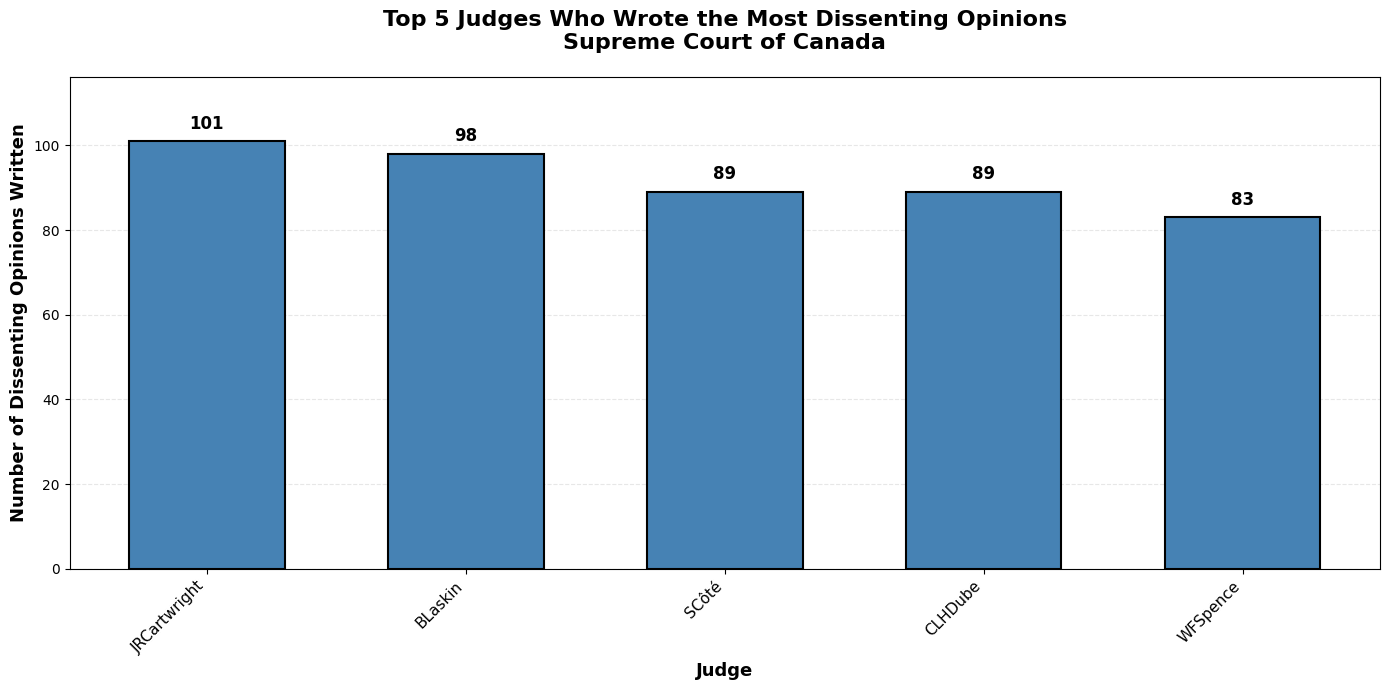


✓ Chart should be displayed above

THEORIES ABOUT DISSENTING OPINIONS

Possible reasons why these 5 judges wrote the most dissenting opinions:

1. **Judicial Philosophy**: These judges may hold distinct interpretive approaches 
   (textualism vs. purposivism, originalism vs. living tree) that differ from 
   the majority, leading to more frequent disagreement.

2. **Appointment Era & Ideological Shifts**: Judges appointed during different 
   political eras may reflect different values. If the Court's composition shifted 
   over time, these judges might represent a philosophical minority.

3. **Tenure Length**: Judges who served longer on the Court had more opportunities 
   to write dissents. A long tenure increases the absolute number of dissents.

4. **Strong Principled Positions**: Some judges are known for taking principled 
   stands on specific issues (e.g., Charter rights, federalism, Indigenous rights) 
   that put them at odds with Court majorities.

5. **Writing Culture**:

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
url = "https://litigate.com/assets/uploads/20230823-140809-6601-SCC-Database-v-2023.01.xlsx"
print("Loading Excel file...")

# Load both sheets
df_main = pd.read_excel(url, sheet_name=0)  # Main sheet
df_justices = pd.read_excel(url, sheet_name='JusticesPresent')  # Justices lookup sheet

print("Dataset loaded successfully!")
print(f"Main sheet shape: {df_main.shape}")
print(f"JusticesPresent sheet shape: {df_justices.shape}")

# Check if dissentWriter column exists
if 'dissentWriter' in df_main.columns:
    print("\nFound 'dissentWriter' column")

    # Drop rows where dissentWriter is null/NaN or equals 0
    df_clean = df_main['dissentWriter'].dropna()
    df_clean = df_clean[df_clean != 0]

    print(f"Rows with valid dissentWriter: {len(df_clean)}")
    print(f"Rows dropped (null or 0 values): {len(df_main) - len(df_clean)}")

    # Count how many times each justiceID appears in dissentWriter
    dissent_counts = df_clean.value_counts()

    print(f"\nTop 10 justiceIDs by dissent count:")
    print(dissent_counts.head(10))

    # Get top 5 justiceIDs
    top_5_ids = dissent_counts.head(5).index.tolist()
    top_5_counts = dissent_counts.head(5).values.tolist()

    print(f"\nTop 5 Justice IDs: {top_5_ids}")
    print(f"Their counts: {top_5_counts}")

    # Look up names in JusticesPresent sheet (also exclude justiceID 0)
    justice_names_df = df_justices[(df_justices['justiceID'].isin(top_5_ids)) &
                                    (df_justices['justiceID'] != 0)][['justiceID', 'justiceName']].dropna()

    print(f"\nJustice names found:")
    print(justice_names_df)

    # Create dictionary for lookup
    id_to_name = dict(zip(justice_names_df['justiceID'], justice_names_df['justiceName']))

    # Get names in same order as top_5_ids, only include those with valid names
    top_5_names = []
    top_5_counts_clean = []

    for justice_id, count in zip(top_5_ids, top_5_counts):
        if justice_id in id_to_name:
            top_5_names.append(id_to_name[justice_id])
            top_5_counts_clean.append(count)
        else:
            print(f"Warning: No name found for justiceID {justice_id}, skipping...")

    if len(top_5_names) == 0:
        print("\nERROR: No valid judge names found after lookup")
    else:
        print("\n" + "="*80)
        print("TOP 5 JUDGES WHO WROTE THE MOST DISSENTING OPINIONS")
        print("="*80)
        for rank, (name, count) in enumerate(zip(top_5_names, top_5_counts_clean), 1):
            print(f"{rank}. {name}: {count} dissenting opinions")

        # Create bar chart
        fig, ax = plt.subplots(figsize=(14, 7))

        x_positions = list(range(len(top_5_names)))

        bars = ax.bar(x_positions, top_5_counts_clean, color='steelblue', edgecolor='black', linewidth=1.5, width=0.6)

        # Labels and title
        ax.set_xlabel('Judge', fontsize=13, fontweight='bold')
        ax.set_ylabel('Number of Dissenting Opinions Written', fontsize=13, fontweight='bold')
        ax.set_title('Top 5 Judges Who Wrote the Most Dissenting Opinions\nSupreme Court of Canada',
                     fontsize=16, fontweight='bold', pad=20)

        # Set x-axis ticks
        ax.set_xticks(x_positions)
        ax.set_xticklabels(top_5_names, rotation=45, ha='right', fontsize=11)

        # Add grid
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        ax.set_axisbelow(True)

        # Add value labels on bars
        for pos, count in zip(x_positions, top_5_counts_clean):
            ax.text(pos, count + max(top_5_counts_clean)*0.02, str(int(count)),
                   ha='center', va='bottom', fontweight='bold', fontsize=12)

        # Set y-axis to start from 0
        ax.set_ylim(bottom=0, top=max(top_5_counts_clean)*1.15)

        plt.tight_layout()
        plt.show()

        print("\n✓ Chart should be displayed above")

        # Theories
        print("\n" + "="*80)
        print("THEORIES ABOUT DISSENTING OPINIONS")
        print("="*80)
        print("""
Possible reasons why these 5 judges wrote the most dissenting opinions:

1. **Judicial Philosophy**: These judges may hold distinct interpretive approaches
   (textualism vs. purposivism, originalism vs. living tree) that differ from
   the majority, leading to more frequent disagreement.

2. **Appointment Era & Ideological Shifts**: Judges appointed during different
   political eras may reflect different values. If the Court's composition shifted
   over time, these judges might represent a philosophical minority.

3. **Tenure Length**: Judges who served longer on the Court had more opportunities
   to write dissents. A long tenure increases the absolute number of dissents.

4. **Strong Principled Positions**: Some judges are known for taking principled
   stands on specific issues (e.g., Charter rights, federalism, Indigenous rights)
   that put them at odds with Court majorities.

5. **Writing Culture**: These judges may have been more willing to formally
   dissent rather than silently concur, reflecting a belief in the importance
   of recording alternative legal reasoning for future courts.

6. **Specific Legal Areas**: The dataset may be weighted toward certain types of
   cases (e.g., criminal, constitutional) where these judges had distinctive views.
        """)

else:
    print("\nERROR: 'dissentWriter' column not found")
    print("Available columns:", df_main.columns.tolist())

### Advanced Question 1:

Using the datasets for Intermediate Questions 1 and 2, print out the names of the 10 Supreme Court judges with the most citations by the Tax Court of Canada since 2010. For simplicity, assume that when a case is cited by the Tax Court of Canada, the Court is citing the majority opinion.

### Everyone: Question 1

If you do not already have an OpenAI API account to access generative AI models via their API, please get one here: https://platform.openai.com/

Note that this is not the same as the account you may use to access the ChatGPT web interface (you can use the same email for both if you do have one, but they are separate accounts).

Unless you already know what you are doing, please do not use the API yet as you may incur charges per use. Instructions will be provided next week about how to use the API.

The minimum amount that you can load into the account is $US 5 (which will be more than enough for module 4). This is a pay per use service, so there aren't any monthly fees.

If you have successfully signed up (or if you already had an account and you have verified that you are able to access it), please indicate that in the markdown cell below.

If the $5 poses a barrier to you, please reach out to me (srehaag@osgoode.yorku.ca) to request a grant from the Refugee Law Laboratory. In doing so, please use the subject line: "Legal Info Tech: Grant requested", and please include an email address that can be used for an e-transfer.

If for whatever reason you would prefer not to sign up for OpenAI (privacy, ethical objections to OpenAI, geopolitical concerns about US-based tech companies, etc), please indicate that in the markdown cell, and indicate your level of coding experience (beginner, intermediate, advanced) so that I can try to find alternatives.

I have successfully signed up for open ai api models

### Everyone: Question 2

If you did not watch the video "Looking Forward: Generative AI" as part of Module 3, please watch it now. Based on the video, and based on other knoweldge you may have about AI, describe an idea you would like to test out involving generative AI and legal data / access to justice.

maybe i can use generative ai and case law dataset to make a consulting app for general public, for them to have an initial picture of legal issues regarding potential legal options and approaches for initial legal consulting screening stage based on the mass legal database, for example: tax issues, immigration issues, and etc. It will save the cost for people in the consulting fee and reduce the barrier in terms of financial and emotional stress.